In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
from sklearn.datasets import make_blobs

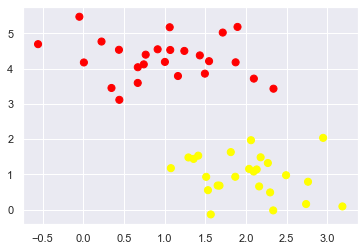

In [3]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.6)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn');

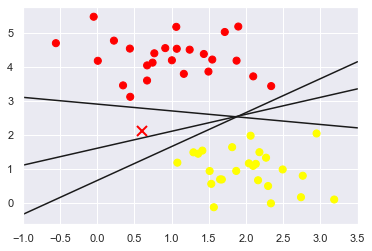

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plt.plot(0.6, 2.1, 'x', c = 'red', markeredgewidth = 2, markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5);

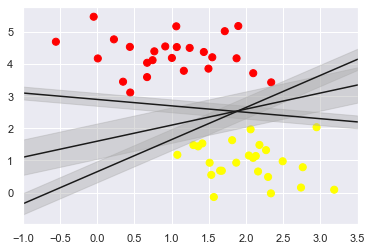

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)
    
plt.xlim(-1, 3.5);

In [6]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none',
                  color = 'gray')
        
    ax.set(xlim = xlim, ylim = ylim);

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

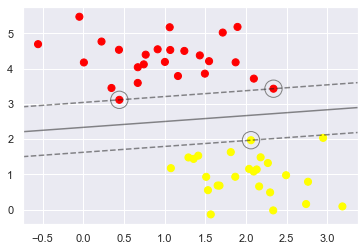

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

In [10]:
def plot_svm(N = 10, ax = None):
    X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.6)
    
    X = X[:N]
    y = y[:N]
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    ax.set(xlim = (-1, 4), ylim = (-1, 6))
    plot_svc_decision_function(model, ax)

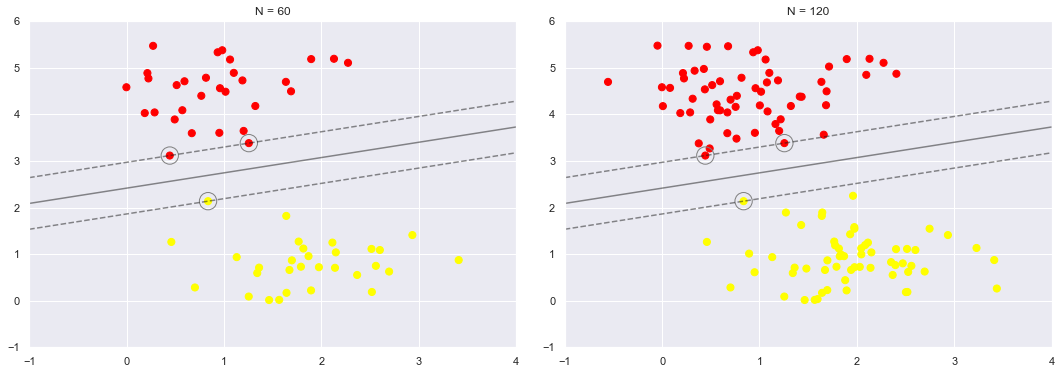

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title(f'N = {N}')

In [12]:
from ipywidgets import interact, fixed

interact(plot_svm, N = [10, 200], ax = fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

In [13]:
from sklearn.datasets import make_circles

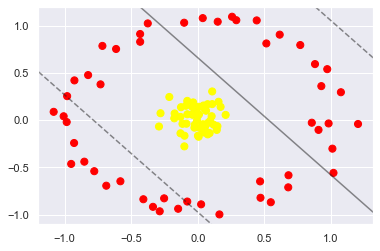

In [14]:
X, y = make_circles(100, factor = .1, noise = .1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False);

In [15]:
r = np.exp(-(X ** 2).sum(1))

In [16]:
from mpl_toolkits import mplot3d

In [17]:
def plot_3D(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'autumn')
    
    ax.view_init(elev = elev, azim = azim)
    ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'r')

In [18]:
interact(plot_3D, elev = [-90, 90], azip = (-180, 180), X = fixed(X), y = fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [19]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

SVC(C=1000000.0)

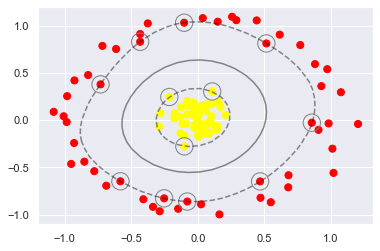

In [20]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf)

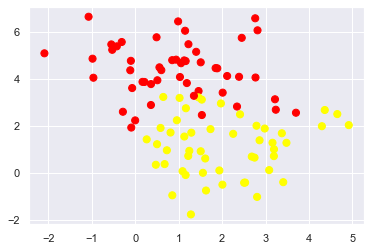

In [21]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

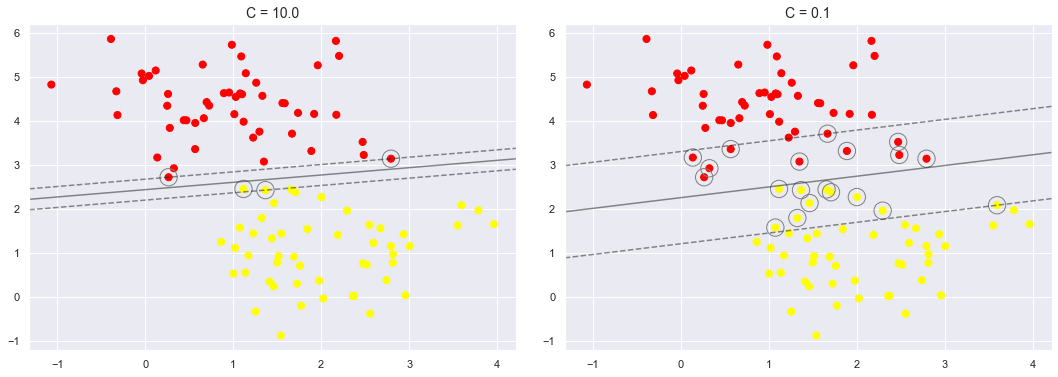

In [22]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    plot_svc_decision_function(model, axi)
    
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

In [23]:
from sklearn.datasets import fetch_lfw_people

In [24]:
faces = fetch_lfw_people(min_faces_per_person = 60)

In [25]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


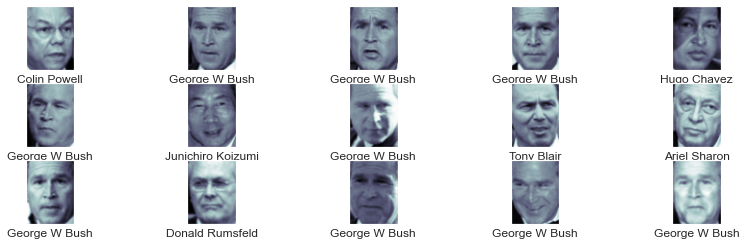

In [26]:
fig, ax = plt.subplots(3, 5, figsize = (14, 4))
#plt.subplots_adjust(hspace = 1)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

In [27]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [28]:
r_pca = PCA(n_components = 150, svd_solver = 'randomized', whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')

model = make_pipeline(r_pca, svc)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [33]:
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [34]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

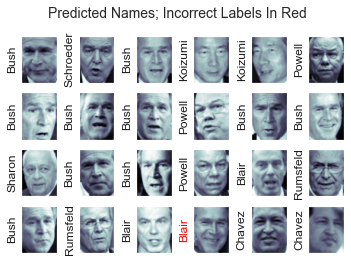

In [35]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], c = 'k' if yfit[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels In Red', size = 14);

In [36]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



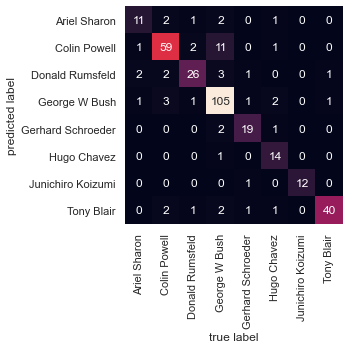

In [37]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = faces.target_names, 
            yticklabels = faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

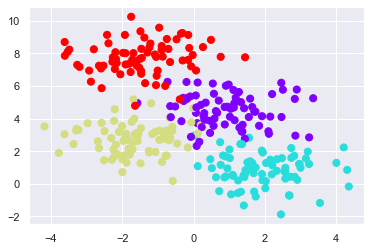

In [41]:
X, y = make_blobs(n_samples = 300, centers = 4, random_state = 0, cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'rainbow');

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

In [46]:
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = ax or plt.gca()
    
    #Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = cmap, clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim)
    print(ylim)
    
    #fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200), np.linspace(*ylim, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    #create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = cmap,
                          clim = (y.min(), y.max()), zorder = 1)
    ax.set(xlim = xlim, ylim = ylim);

(-4.613339274735419, 4.786447242633593)
(-2.4810712360724163, 10.854055834769046)


<ipython-input-46-9ca5744a811c>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = cmap,


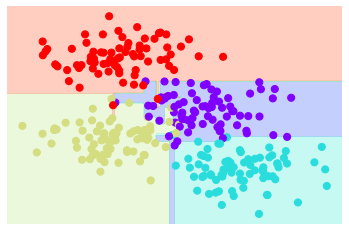

In [47]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [48]:
from data import helpers_05_08

In [49]:
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [50]:
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8, random_state = 1)

(-4.613339274735419, 4.786447242633593)
(-2.4810712360724163, 10.854055834769046)


<ipython-input-46-9ca5744a811c>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = cmap,


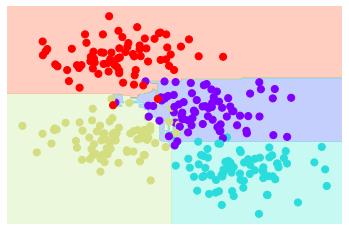

In [56]:
bag.fit(X, y)
visualize_classifier(bag, X, y)